### Finding the Optimal Portfolio Weights

1. Assume there are 9 stock tickers belonging to the VN30 index, which consists of 9 listed companies that individual investors are familiar with and have a certain level of understanding about their businesses. These companies operate in various industries including Banking, Securities, Real Estate, Construction, and Oil & Gas.

2. Is there a need to exclude any stock tickers from the portfolio, and what should be the allocation weights for each asset?

#### Approach 1. Portfolio optimization applied Markowit's theory

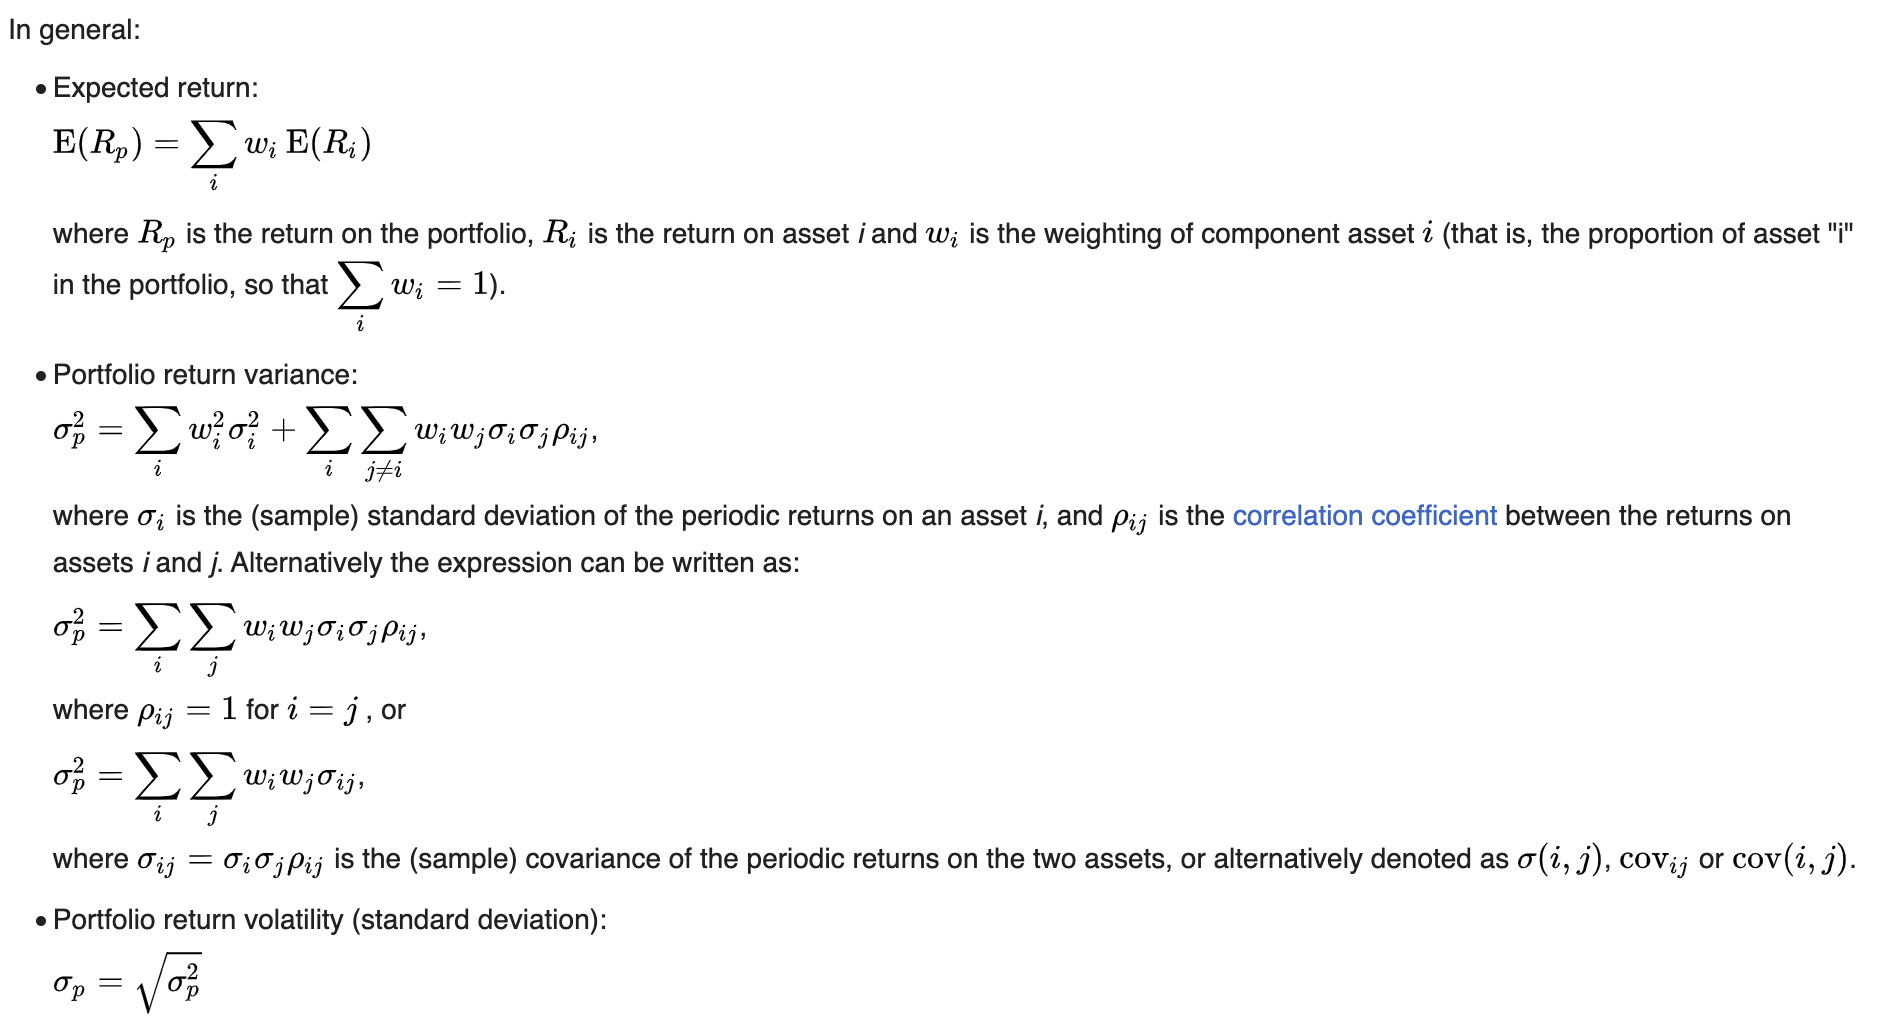

##### 1. Preprocess
1.1. Ready for raw data

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [29]:
df = pd.read_excel('/Users/nguyenhien/Desktop/OneDrive/2. Learning/2.5 Master of finance/3. Learning/12. Quantitative/Tiểu luận/Data_portfolio.xlsx')
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(str(x), "%m.%d.%Y").strftime("%Y-%m-%d"))
df = df[df.columns[[0, *range(3, 12)]]]
df

,Date,HPG,STB,VCB,POW,VNM,SSI,MBB,NVL,TCH
0,2023-06-12,22950.0,28150.0,99900.0,13750.0,66000.0,25250.0,20300.0,14800.0,9000.0
1,2023-06-09,22900.0,27700.0,100000.0,13850.0,65600.0,24500.0,20100.0,14250.0,9040.0
2,2023-06-08,22800.0,28300.0,97000.0,13850.0,66500.0,25300.0,20350.0,14800.0,9280.0
3,2023-06-07,22600.0,28700.0,99000.0,13900.0,66500.0,25150.0,20450.0,13800.0,9090.0
4,2023-06-06,21750.0,28050.0,98000.0,14000.0,66900.0,24100.0,19900.0,13500.0,8890.0
...,...,...,...,...,...,...,...,...,...,...
853,2020-01-08,10728.8,10050.0,66733.0,11200.0,96206.0,9832.4,11062.6,30875.0,28160.7
854,2020-01-07,10843.2,10050.0,66810.0,11400.0,95394.0,9914.1,11169.0,30819.0,27789.6
855,2020-01-06,10980.4,10100.0,68499.0,11650.0,95800.0,9886.9,11248.8,30986.0,27789.6
856,2020-01-03,11049.1,10250.0,70265.0,11900.0,95962.0,10077.5,11408.3,31876.0,27459.7


In [11]:
# # Tạo DataFrame để lưu dữ liệu
# df = pd.DataFrame()

# # Truy vấn dữ liệu và lưu vào DataFrame
# for ticket in ticket_list:
#     data = yf.download(ticket, start=startDate, end=endDate)
#     df[ticket] = data['Adj Close']
# df

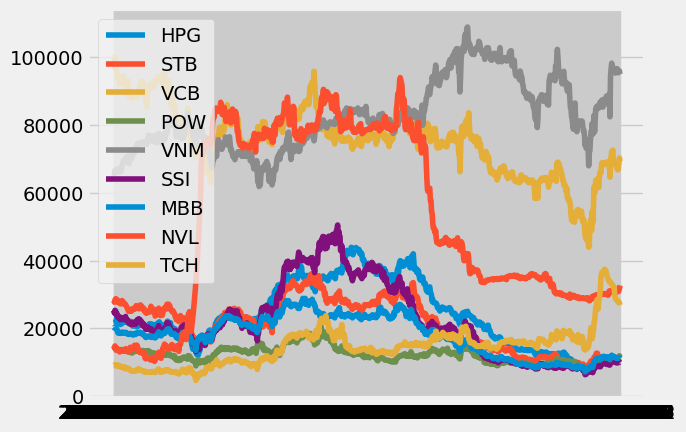

In [41]:
for name in df.columns.values:
    plt.plot(df[name], label = name)
plt.legend(df.columns.values, loc = 'upper left')
plt.show()

1.2. Calculation

In [42]:
# Daily change
daily_return = df.pct_change()

# Anually matrix
anual_cov_matrix = daily_return.cov() * 252
anual_cov_matrix

,HPG,STB,VCB,POW,VNM,SSI,MBB,NVL,TCH
HPG,0.154441,0.021491,0.007185,0.006730,0.002143,0.026701,0.017351,0.007133,0.013564
STB,0.021491,0.260404,0.086852,0.137767,0.057119,0.192064,0.155659,0.034707,0.145117
VCB,0.007185,0.086852,0.110541,0.077882,0.042890,0.090605,0.082335,0.020205,0.067900
POW,0.006730,0.137767,0.077882,0.263371,0.059959,0.165810,0.112197,0.039274,0.163432
VNM,0.002143,0.057119,0.042890,0.059959,0.075162,0.062906,0.048761,0.009986,0.054822
SSI,0.026701,0.192064,0.090605,0.165810,0.062906,0.307150,0.154178,0.045509,0.190924
MBB,0.017351,0.155659,0.082335,0.112197,0.048761,0.154178,0.157780,0.033953,0.112023
NVL,0.007133,0.034707,0.020205,0.039274,0.009986,0.045509,0.033953,0.170073,0.056350
TCH,0.013564,0.145117,0.067900,0.163432,0.054822,0.190924,0.112023,0.056350,0.373241


In [56]:
random_values = np.random.random(9)
weights = random_values / np.sum(random_values)
weights

array([0.02066447, 0.0790052 , 0.12978086, 0.09779598, 0.13368029,
       0.12187262, 0.09675331, 0.14682526, 0.17362201])

In [57]:


# Port variance
port_variance = np.dot( weights.T, np.dot(anual_cov_matrix, weights))
# Port votality
port_votality = np.sqrt(port_variance)
# Port anual return
anual_port_return = np.sum(daily_return.mean()* weights) * 252

port_variance, port_votality, anual_port_return

(0.0985892861824682, 0.31398930902575045, 0.11364228351806348)

In [58]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns


In [59]:
# Optimization Port !
# Find expected returns
mu = expected_returns.mean_historical_return(df)
# Find the covariance matrix
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
effi = EfficientFrontier(mu, S)
weights = effi.max_sharpe()
update_weights = effi.clean_weights()
print(update_weights)
effi.portfolio_performance(verbose = True)

OrderedDict([('HPG', 0.0), ('STB', 0.0), ('VCB', 0.0), ('POW', 0.0), ('VNM', 0.23485), ('SSI', 0.0), ('MBB', 0.0), ('NVL', 0.47581), ('TCH', 0.28935)])
Expected annual return: 26.1%
Annual volatility: 31.5%
Sharpe Ratio: 0.77


(0.2608461194987627, 0.314793417491971, 0.7650926166678997)

In [67]:
# Discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = update_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10**9)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation', allocation)


Discrete allocation {'VNM': 2472, 'NVL': 14571, 'TCH': 10780}


##### Reference
https://www.wallstreetmojo.com/markowitz-model/#:~:text=The%20Harry%20Markowitz%20Model%20states,investor%20may%20have%20to%20bear.
https://www.youtube.com/watch?v=9fjs8FeLMJk